In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/content/placement_college.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


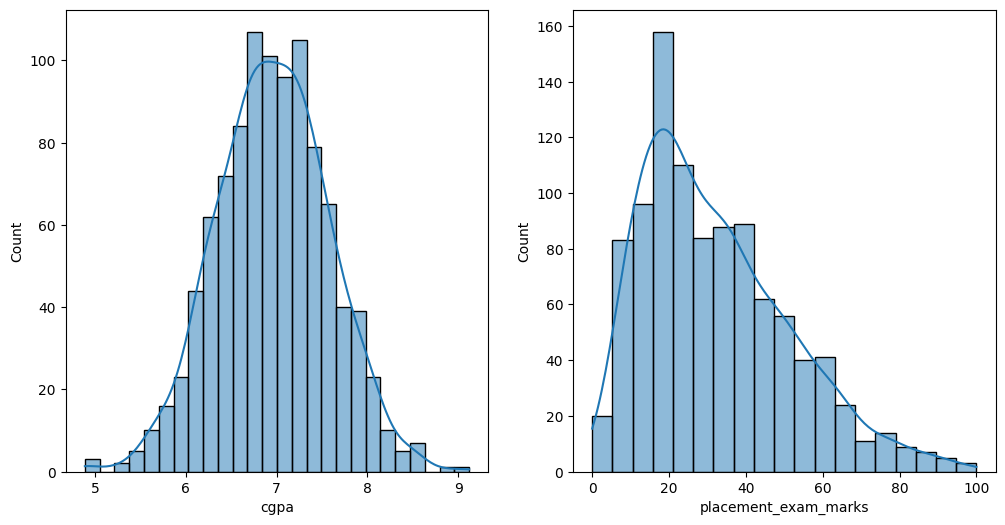

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(df['cgpa'], kde=True)
plt.subplot(122)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.show()

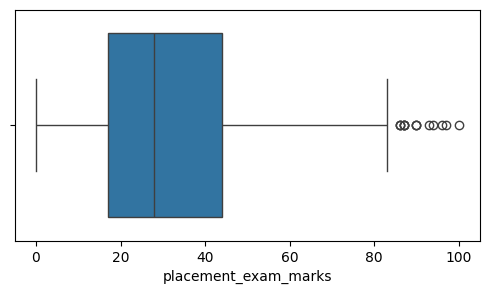

In [51]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['placement_exam_marks'], orient='h')
plt.show()

In [52]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [53]:
Percentile_25 = df['placement_exam_marks'].quantile(0.25)
Percentile_75 = df['placement_exam_marks'].quantile(0.75)
IQR = Percentile_75 - Percentile_25

In [54]:
Percentile_25, Percentile_75, IQR

(17.0, 44.0, 27.0)

In [55]:
Upper_limit = Percentile_75 + 1.5*IQR
Lower_limit = Percentile_25 - 1.5*IQR

In [56]:
Upper_limit, Lower_limit

(84.5, -23.5)

# Finding Outliers

In [57]:
df[df['placement_exam_marks'] > Upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [58]:
df[df['placement_exam_marks'] < Lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [59]:
df_trim = df[(df['placement_exam_marks'] < Upper_limit) & (df['placement_exam_marks'] > Lower_limit)]

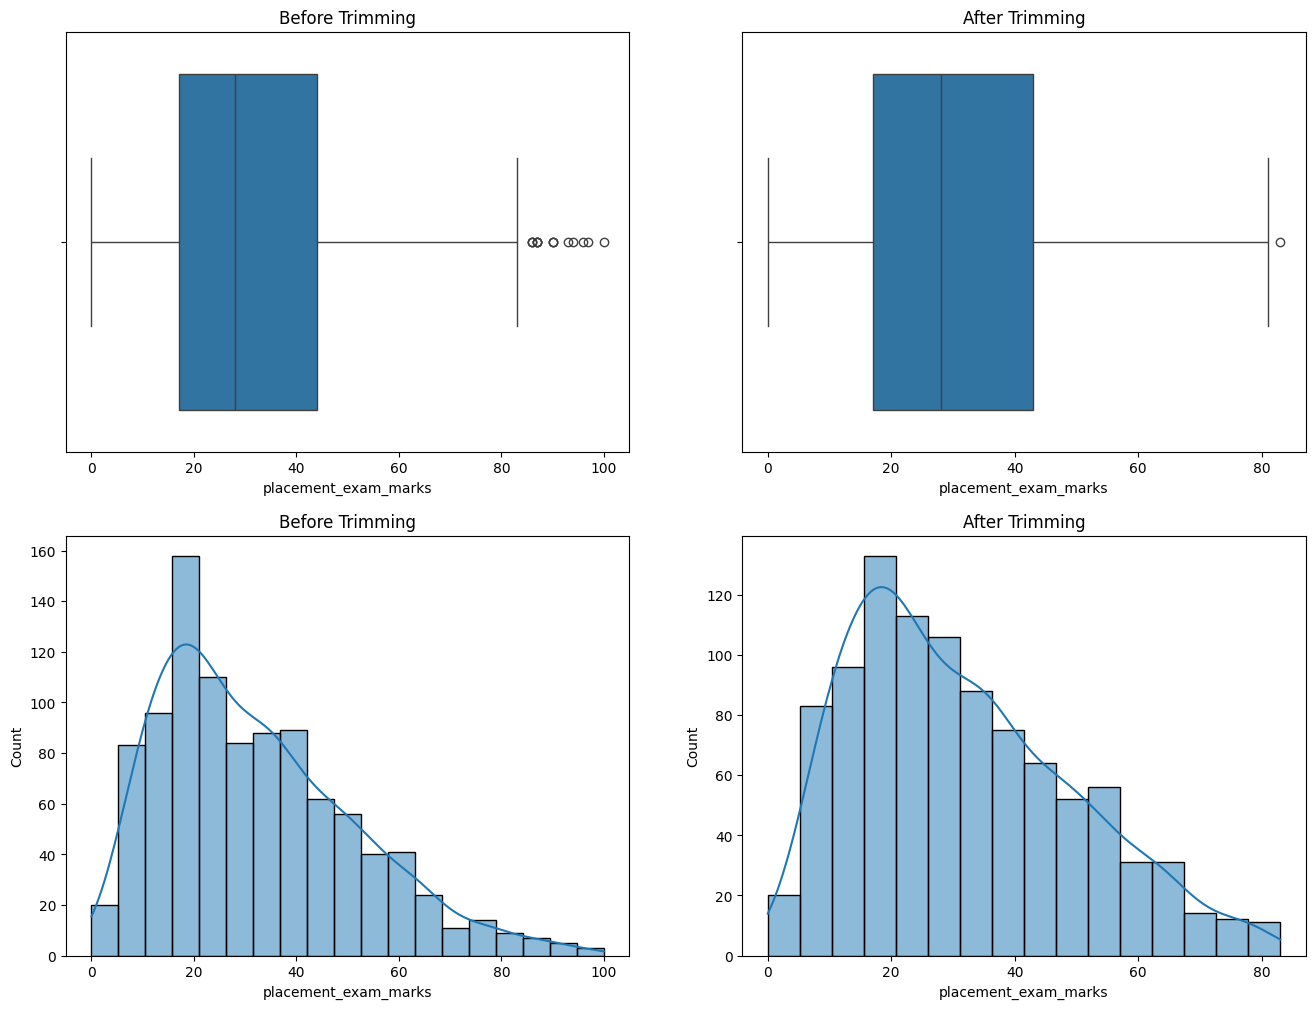

In [60]:
# Graph Comparison
plt.figure(figsize=(16, 12))

plt.subplot(221)
sns.boxplot(x=df['placement_exam_marks'], orient='h')
plt.title('Before Trimming')

plt.subplot(222)
sns.boxplot(x=df_trim['placement_exam_marks'], orient='h')
plt.title('After Trimming')

plt.subplot(223)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Before Trimming')

plt.subplot(224)
sns.histplot(df_trim['placement_exam_marks'], kde=True)
plt.title('After Trimming')

plt.show()

# Capping


In [61]:
df_cap = df.copy()

df_cap['placement_exam_marks'] = np.where(
    df_cap['placement_exam_marks'] > Upper_limit,
    Upper_limit,
    np.where(
        df_cap['placement_exam_marks'] < Lower_limit,
        Lower_limit,
        df_cap['placement_exam_marks']
    )
)

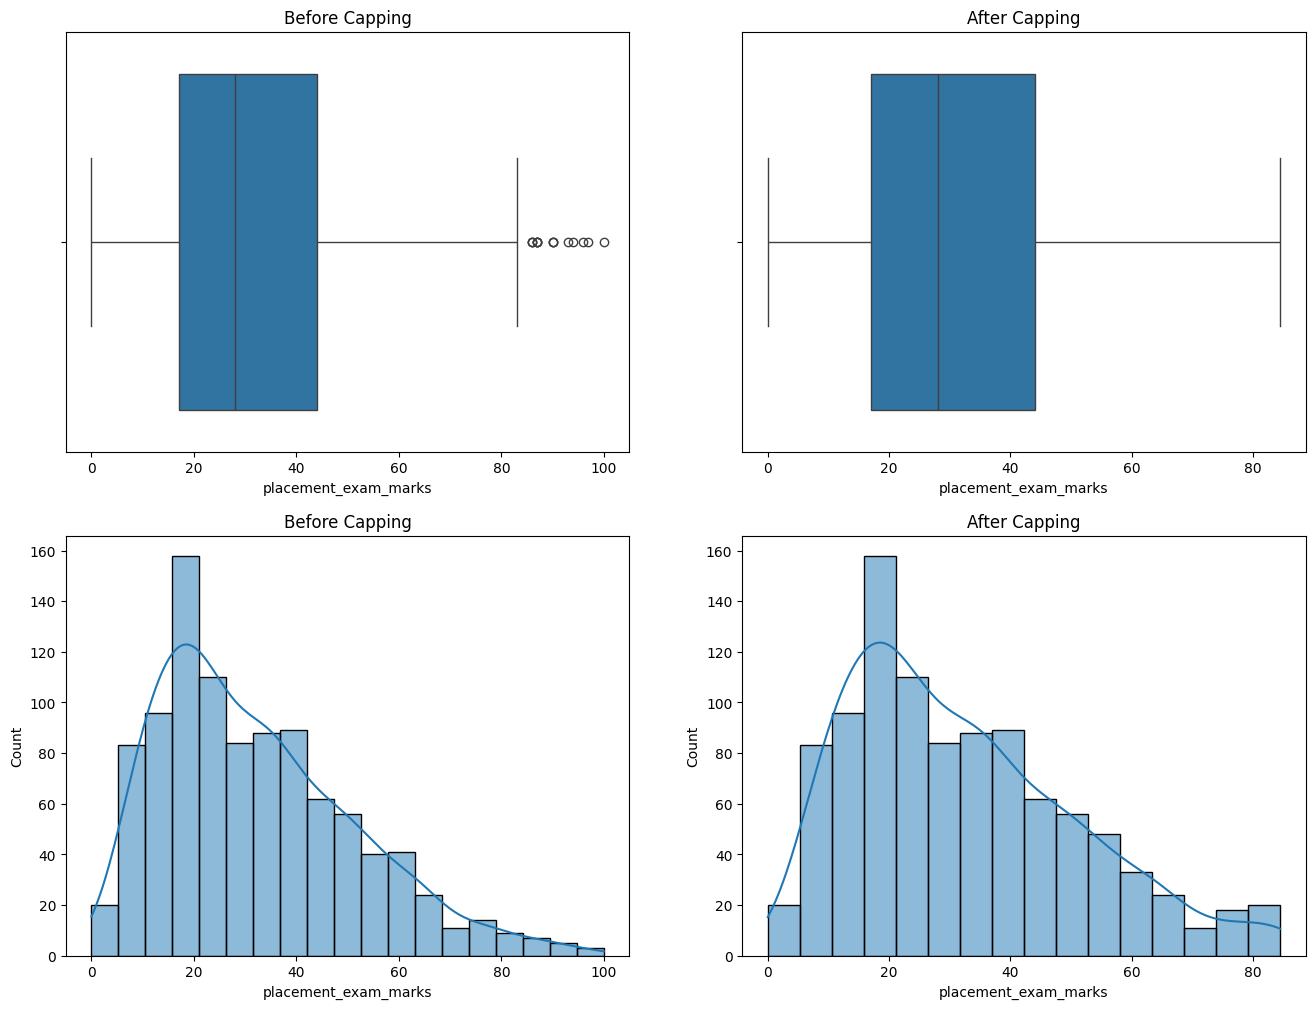

In [62]:
# Graph Comparison
plt.figure(figsize=(16, 12))

plt.subplot(221)
sns.boxplot(x=df['placement_exam_marks'], orient='h')
plt.title('Before Capping')

plt.subplot(222)
sns.boxplot(x=df_cap['placement_exam_marks'], orient='h')
plt.title('After Capping')

plt.subplot(223)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Before Capping')

plt.subplot(224)
sns.histplot(df_cap['placement_exam_marks'], kde=True)
plt.title('After Capping')

plt.show()